<a href="https://colab.research.google.com/github/leonarddocchagas/data_science/blob/master/Estudo_de_Caso_da_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt='Covid-19' width='20%' src='https://github.com/leonarddocchagas/data_science/blob/master/projetos/covid_19/covid_19.png?raw=true' />

##**Estudo de Caso da COVID-19**

Os coronavírus são uma grande família de vírus comuns em muitas espécies diferentes de animais, incluindo camelos, gado, gatos e morcegos. Raramente, os coronavírus que infectam animais podem infectar pessoas, como exemplo do MERS-CoV e SARS-CoV. Recentemente, em dezembro de 2019, houve a transmissão de um novo coronavírus (SARS-CoV-2), o qual foi identificado em Wuhan na China e causou a COVID-19, sendo em seguida disseminada e transmitida pessoa a pessoa.

A COVID-19 é uma doença causada pelo coronavírus, denominado SARS-CoV-2, que apresenta um espectro clínico variando de infecções assintomáticas a quadros graves. De acordo com a Organização Mundial de Saúde, a maioria (cerca de 80%) dos pacientes com COVID-19 podem ser assintomáticos ou oligossintomáticos (poucos sintomas), e aproximadamente 20% dos casos detectados requer atendimento hospitalar por apresentarem dificuldade respiratória, dos quais aproximadamente 5% podem necessitar de suporte ventilatório.

- Fonte: Ministério da Saúde: https://coronavirus.saude.gov.br/sobre-a-doenca

##Obtenção dos Dados

####**Sobre**
No caso do Brasil, a dificuldade em ter acesso aos dados de qualidade é grande. Em meio ao maior problema de saúda de nossa Era, existem questão uma "guerra política" e que, digamos, acontece desde o tempo do império. Impressa e Governo divergem em relação aos números e, como sempre, quem sofre é a população.

Os dados que serão utilizado na análise, foram retirados no portal open-source <a href='https://ourworldindata.org/coronavirus/country/brazil?country=~BRA'>Our World in Data</a> e possuem registro da doença de diversos países pelo mundo. 

**Fonte**
* Url: https://ourworldindata.org/coronavirus/country/brazil?country=~BRA

####**Dicionário**
Por conta da quantidade de linha, resolvi não apresentar de forma visual, então, para quem quiser consultar o dicionário de dados, basta acessar o link que está logo abaixo:
https://github.com/leonarddocchagas/data_science/blob/master/projetos/covid_19/DicionarioCovid19.xlsx

##Análise Exploratória

In [1]:
# bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.gridspec as GridSpec
import seaborn as sns

%matplotlib notebook

# path
dataset_path = 'https://raw.githubusercontent.com/leonarddocchagas/data_science/master/projetos/covid_19/owid-covid-data.csv'
# dataset
df = pd.read_csv(dataset_path)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


**Tamanho e variáveis**

In [2]:
# exibindo colunas dataset
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [3]:
# tamanho dataset
print('Entradas: {}' .format(df.shape[0]))
print('Variáveis: {}' .format(df.shape[1]))

Entradas: 42863
Variáveis: 41


In [4]:
# tipos de dados
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
new_cases_smoothed                 float64
total_deaths                       float64
new_deaths                         float64
new_deaths_smoothed                float64
total_cases_per_million            float64
new_cases_per_million              float64
new_cases_smoothed_per_million     float64
total_deaths_per_million           float64
new_deaths_per_million             float64
new_deaths_smoothed_per_million    float64
new_tests                          float64
total_tests                        float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_per_case                     float64
positive_ra

**Dados faltantes e tratamento**

Verificamos que em nosso dataset, a coluna data está com o tipo `object` e, estando neste formado, interfere negativamente em nossas plotagem gráfica. O melhor a fazer é converter para tipo "date" e ainda, separar por mês e ano. 

In [5]:
# convertendo para tipo date
df['date'] = pd.to_datetime(df['date'])

In [6]:
# criando coluna ano e mês
# ano
df['ano'] = df.date.dt.year

# mês
df['mes'] = df.date.dt.month

# dia
df['dia'] = df.date.dt.day

In [7]:
# verificar as novas colunas
df.filter(items=['ano', 'mes']).head(1)

,ano,mes
0,2019,12


In [8]:
# verificar faltantes
df.isnull().sum() #/ df.shape[0]

iso_code                             255
continent                            510
location                               0
date                                   0
total_cases                          580
new_cases                            771
new_cases_smoothed                  1553
total_deaths                         580
new_deaths                           771
new_deaths_smoothed                 1553
total_cases_per_million              835
new_cases_per_million                835
new_cases_smoothed_per_million      1618
total_deaths_per_million             835
new_deaths_per_million               835
new_deaths_smoothed_per_million     1618
new_tests                          28296
total_tests                        27928
total_tests_per_thousand           27928
new_tests_per_thousand             28296
new_tests_smoothed                 26477
new_tests_smoothed_per_thousand    26477
tests_per_case                     27668
positive_rate                      27288
tests_units     

## Visualizando os dados

In [9]:
# casos por ano
df.ano.value_counts()

2020    42795
2019       68
Name: ano, dtype: int64

Como o número esmagador de casos ocorreu em 2020, resolvemos filtrar nosso dataset para trazer informação do mesmo. 

In [10]:
# limitando dataset
df = df.loc[df['ano'] == 2020]

In [11]:
# top 3 total de mortes
df_top5 = df.loc[df['date'] == '2020-09-10', ['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[1:6]

# exibe top 5
df_top5.head()

,location,total_deaths
40562,United States,190815.0
5773,Brazil,128539.0
18151,India,75062.0
25452,Mexico,69095.0
40307,United Kingdom,41594.0


In [12]:
# movimentação dos ultimos 31 dias, do penúltimo mês de coleta.
df_31_dias_agosto = df.loc[(df.date >= '2020-08-01') & (df.date <= '2020-08-31'), ['dia', 'total_deaths']].sort_values('total_deaths')

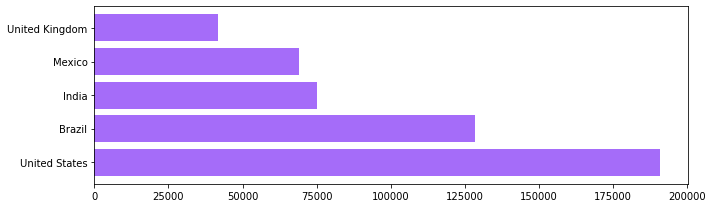

In [13]:
# gráfico: top 5 e movimentação dos 31 dias de Agosto/2020
fig, ax = plt.subplots(figsize=(10, 3))

# gráfico 1
ax.barh(df_top5.location, df_top5.total_deaths, color='#a56cf9')

plt.tight_layout()

##Conclusão


O Ano de 2020 sem dúvidas entrou para histório, pena que, de forma negativa. Ano que vivemos a maior pandemia que se tem registro. Muitas mortes em todos os pais do mundo. Países unidos em busca de uma vacina para estacionar as perdas. Espero tudo isso sirva de lição e, nos fortaleça como humanidade. 